# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read the CSV file
df = pd.read_csv("Comined_5000.csv")

# Display the first few rows of the dataframe
print(df.head())

   CustomerID FirstName LastName                  Email  PhoneNumber  \
0           1       Eva    Varma  sahnivedika@gmail.com   3884212199   
1           1       Eva    Varma  sahnivedika@gmail.com   3884212199   
2           1       Eva    Varma  sahnivedika@gmail.com   3884212199   
3           1       Eva    Varma  sahnivedika@gmail.com   3884212199   
4           1       Eva    Varma  sahnivedika@gmail.com   3884212199   

             Address    City        State  ZipCode Country  ...  Gender  \
0  14, Gulati Circle  Nagpur  Maharashtra    40001   India  ...    Male   
1  14, Gulati Circle  Nagpur  Maharashtra    40001   India  ...    Male   
2  14, Gulati Circle  Nagpur  Maharashtra    40001   India  ...    Male   
3  14, Gulati Circle  Nagpur  Maharashtra    40001   India  ...    Male   
4  14, Gulati Circle  Nagpur  Maharashtra    40001   India  ...    Male   

  Product   Price  Quantity         PurchaseDate     PageVisited  \
0  Camera  150.74         1  2023-06-14 00:06:58

In [3]:
# Get information about the dataframe
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       50000 non-null  int64  
 1   FirstName        50000 non-null  object 
 2   LastName         50000 non-null  object 
 3   Email            50000 non-null  object 
 4   PhoneNumber      50000 non-null  int64  
 5   Address          50000 non-null  object 
 6   City             50000 non-null  object 
 7   State            50000 non-null  object 
 8   ZipCode          50000 non-null  int64  
 9   Country          50000 non-null  object 
 10  Age              50000 non-null  int64  
 11  Gender           50000 non-null  object 
 12  Product          50000 non-null  object 
 13  Price            50000 non-null  float64
 14  Quantity         50000 non-null  int64  
 15  PurchaseDate     50000 non-null  object 
 16  PageVisited      50000 non-null  object 
 17  VisitDate   

# Univariate Analysis

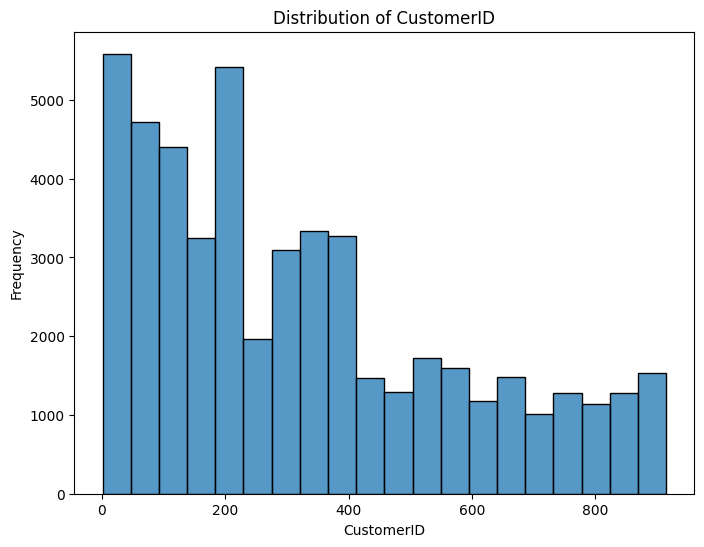

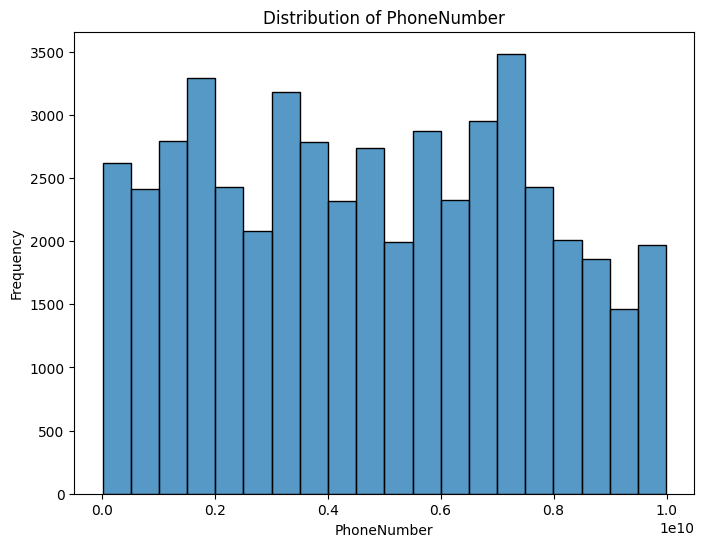

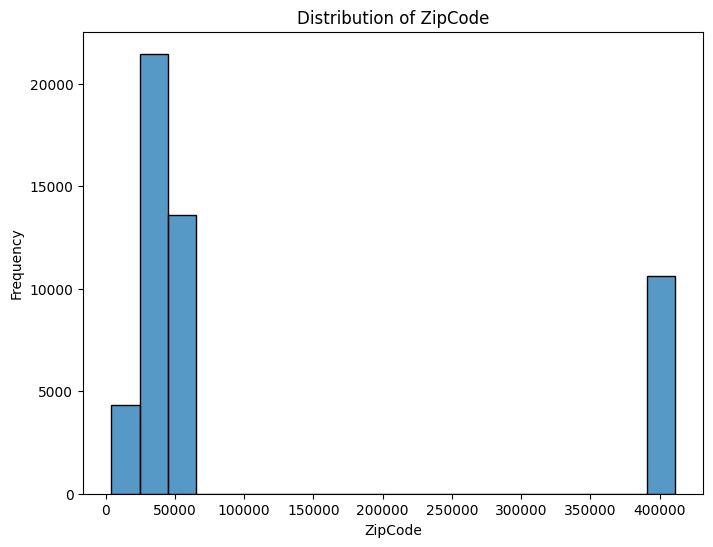

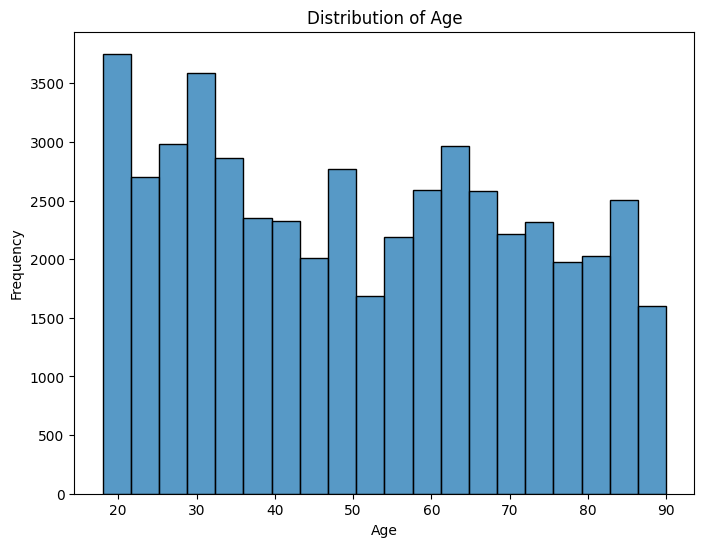

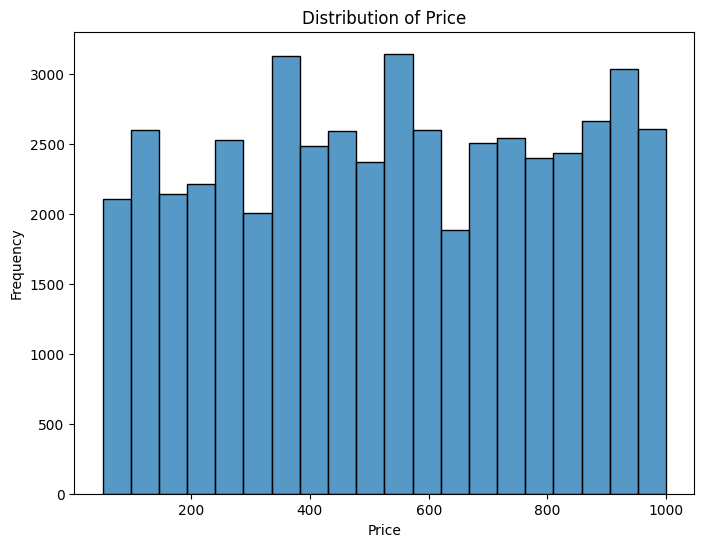

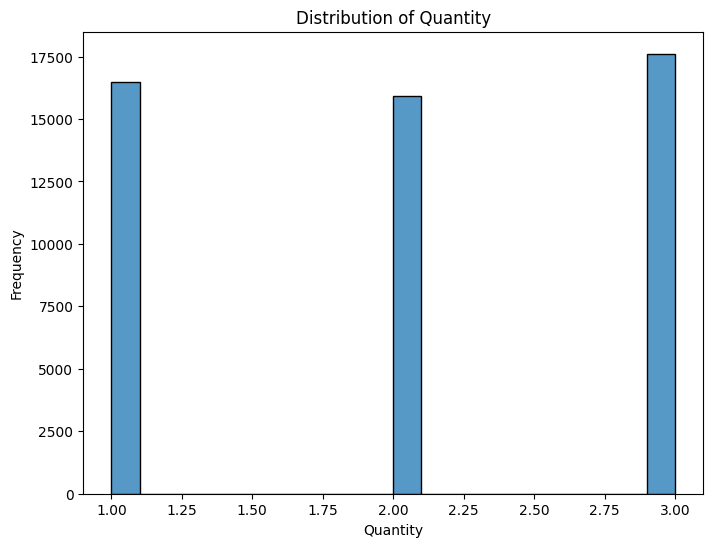

In [4]:
# Univariate Analysis
# Let's start with numeric variables
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

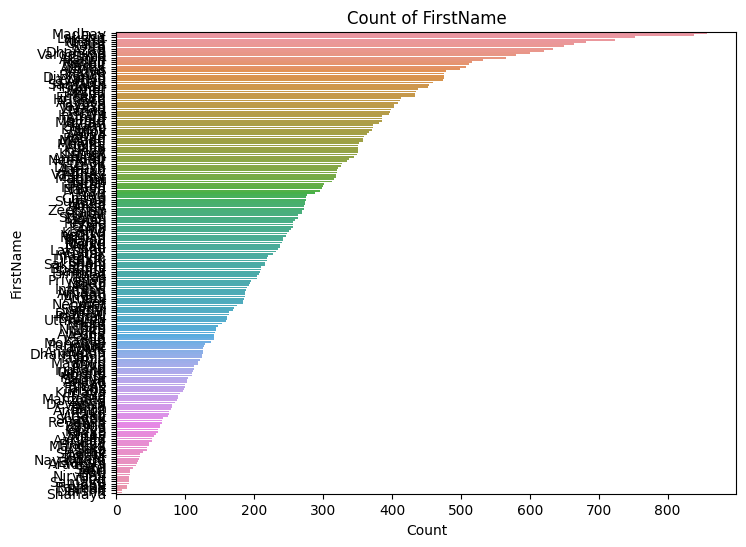

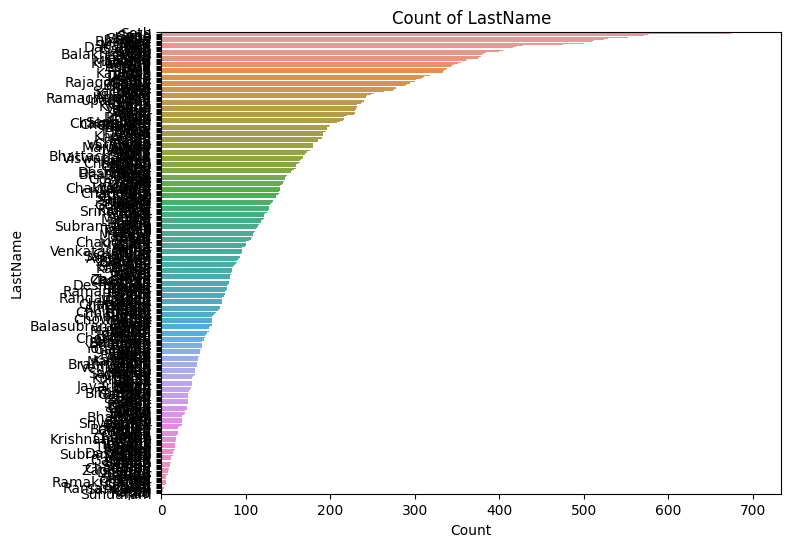

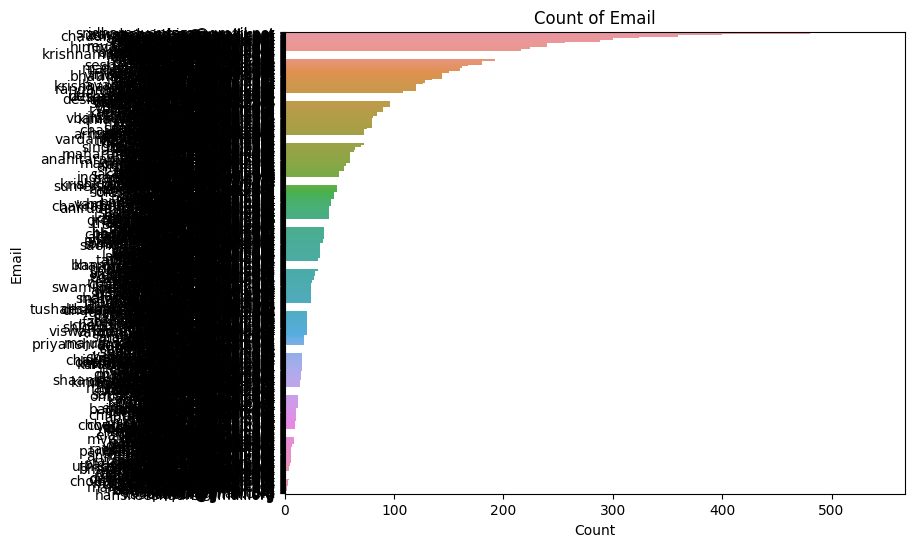

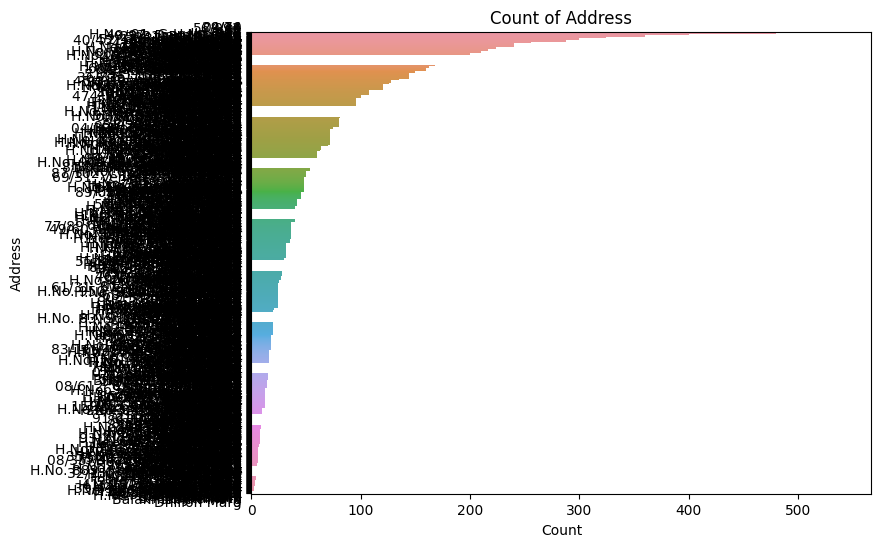

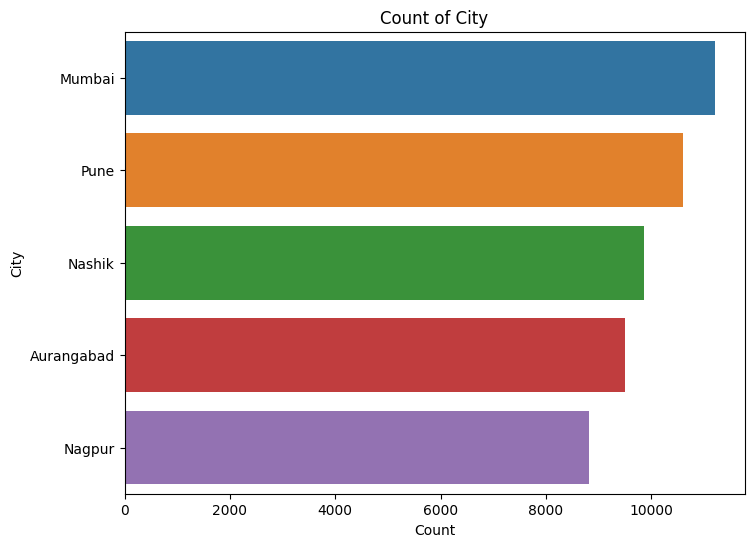

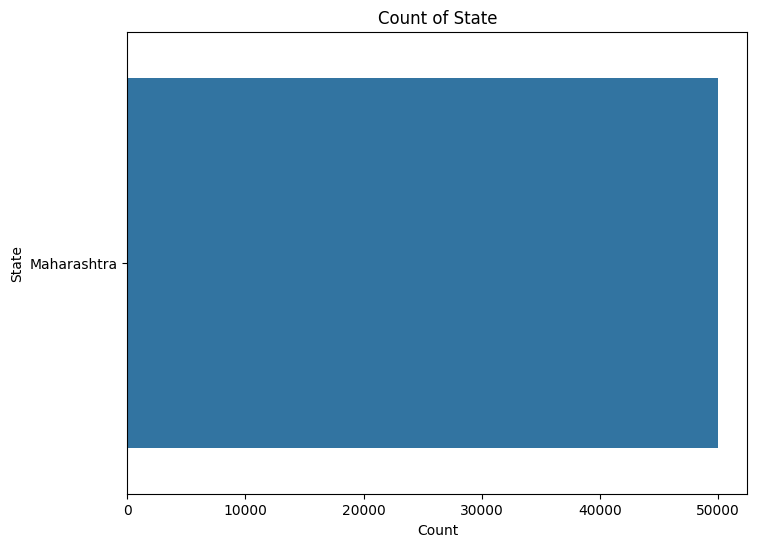

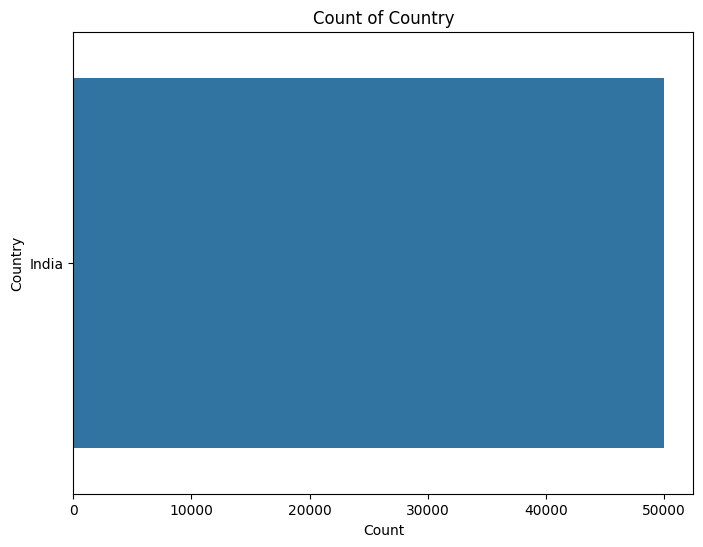

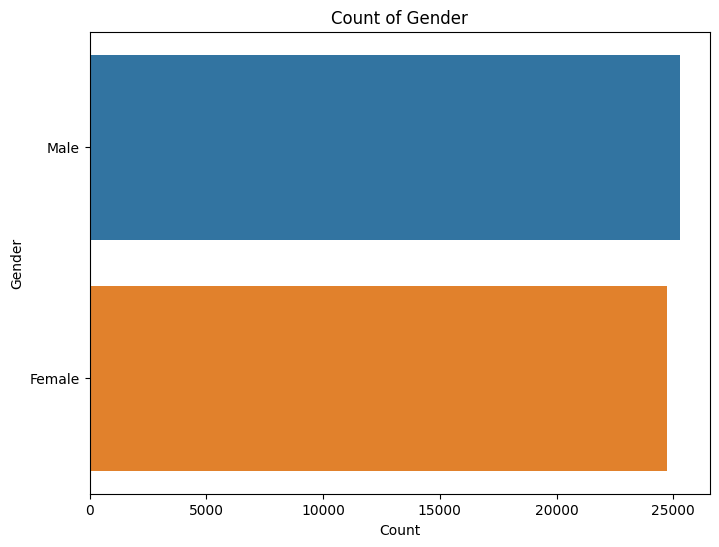

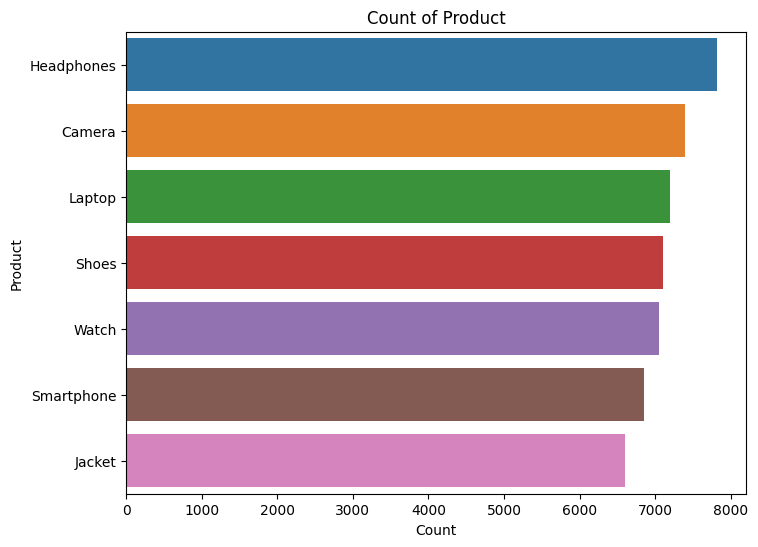

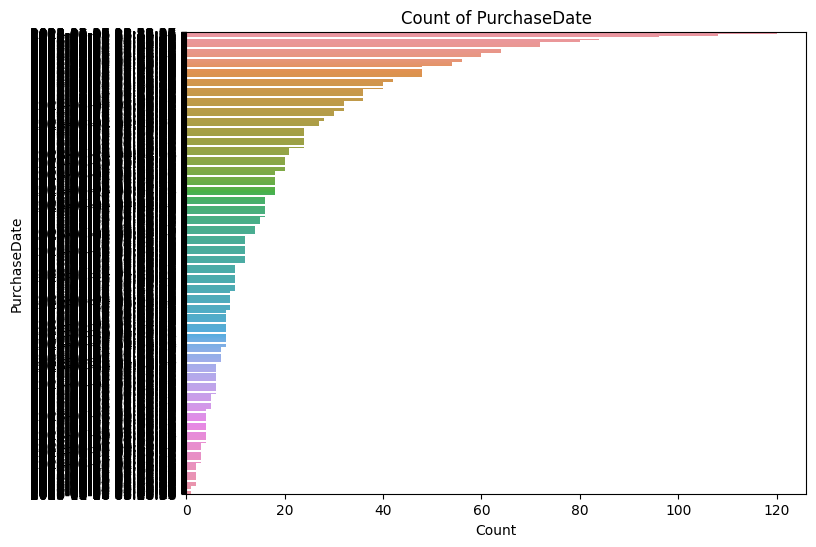

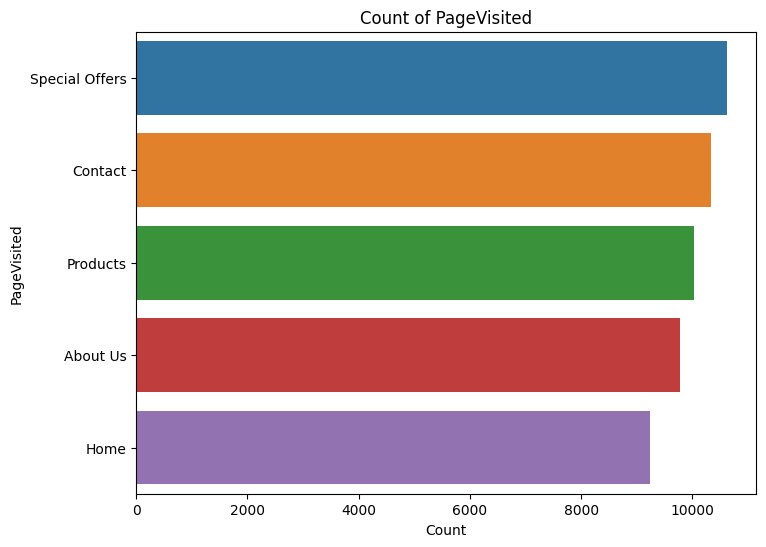

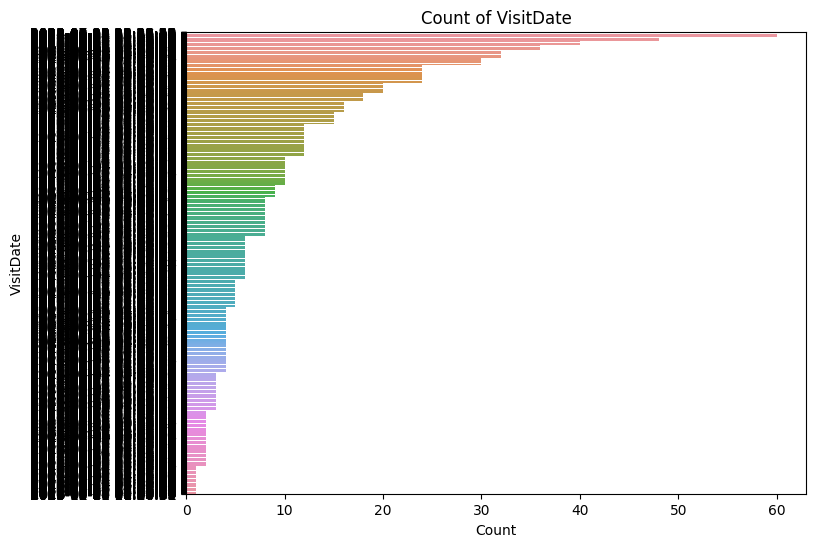

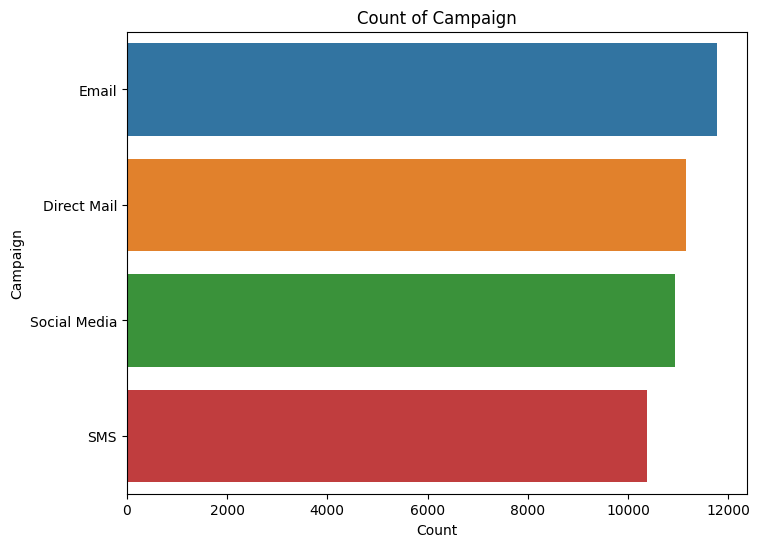

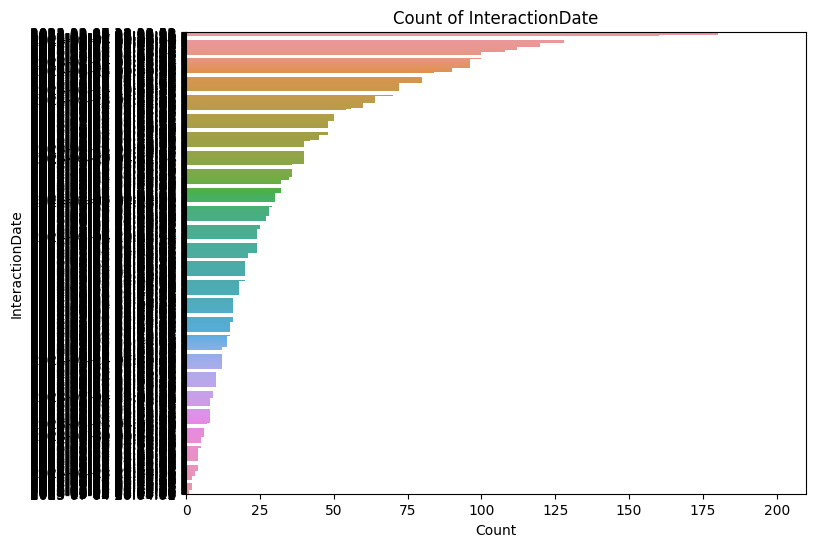

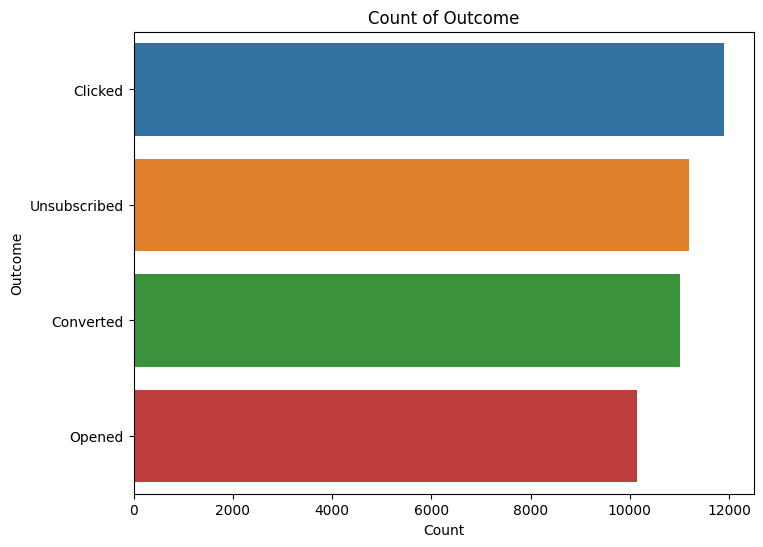

In [5]:
# Now, let's analyze categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Multivarient Analysis

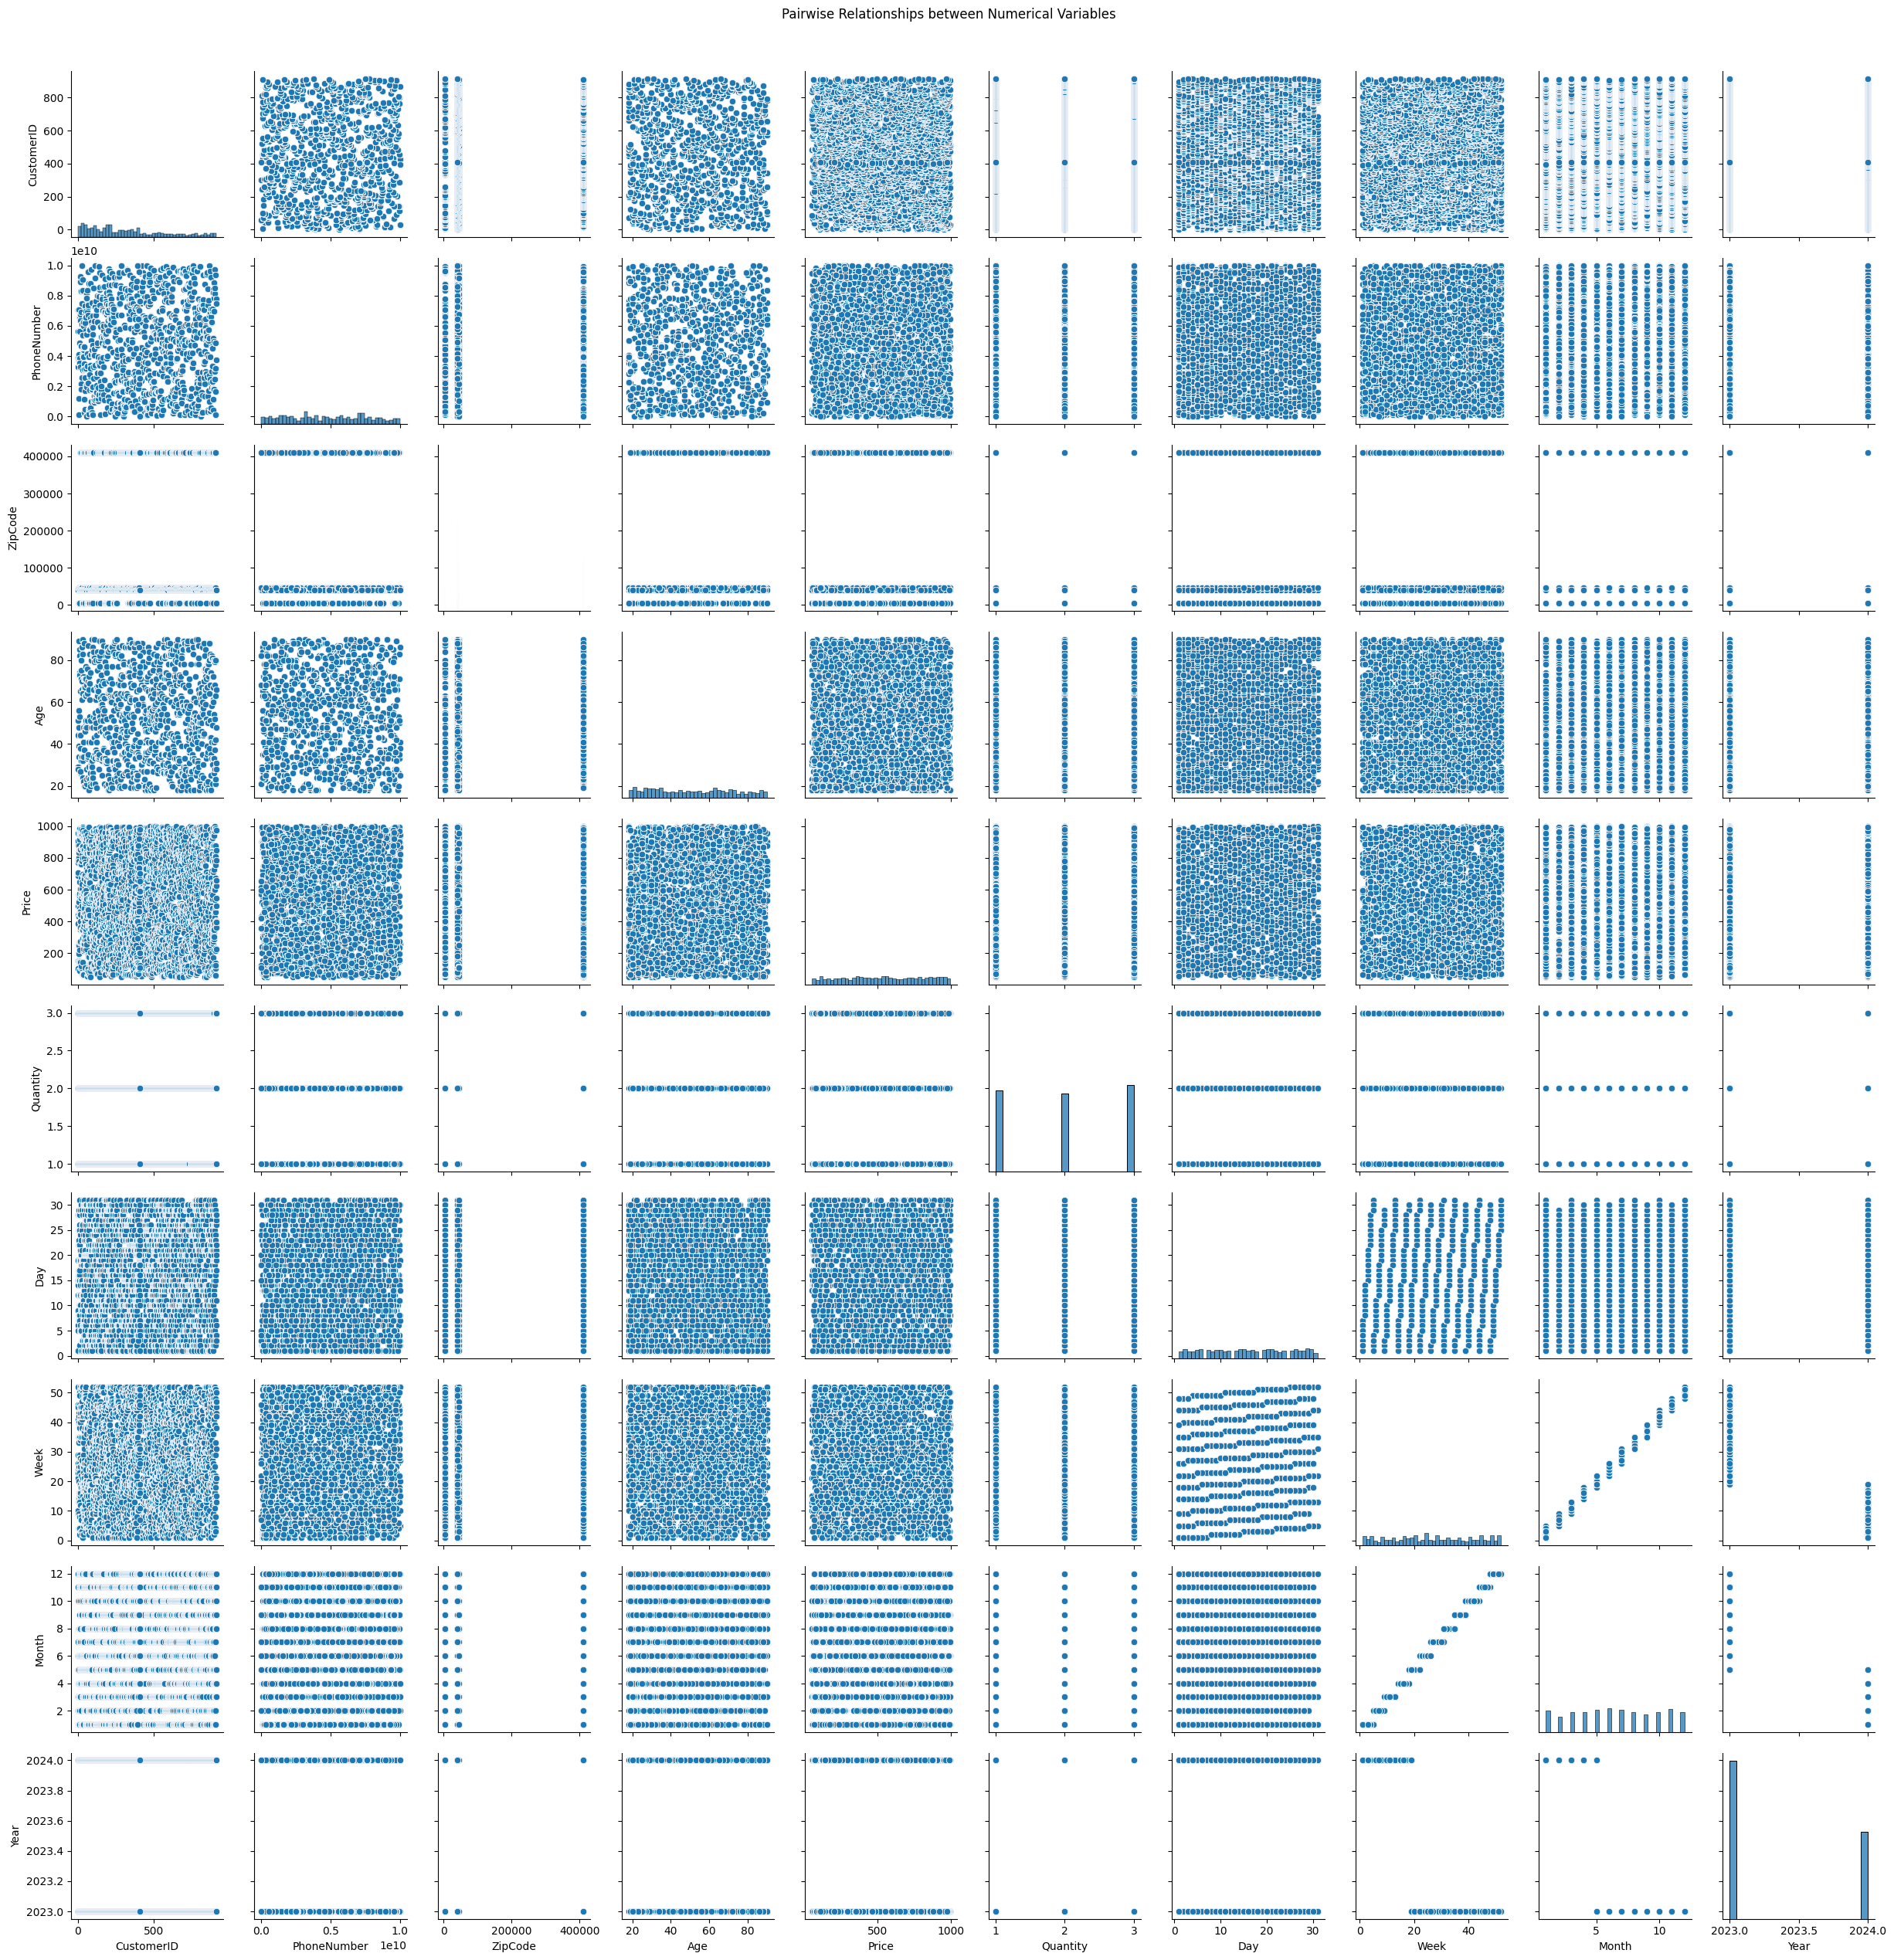

In [28]:
# Select only numeric columns for multivariate analysis
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Pair plot
sns.pairplot(df[numeric_cols])
plt.suptitle("Pairwise Relationships between Numerical Variables", y=1.02)
plt.show()


# Geospatial Analysis

In [19]:
import folium

# Create a map centered at a specific location
m = folium.Map(location=[20.593683, 78.962883], zoom_start=10)

# Add data points to the map
for index, row in df.iterrows():
    folium.Marker([20.593683, 78.962883], popup=row['FirstName'] + ' ' + row['LastName']).add_to(m)

# Save the map
# m.save('map.html')
# Display the map in the notebook
# IFrame(src='map.html', width=700, height=600)

# Temporal Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_24256\1063959338.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['PurchaseDate'].dt.week


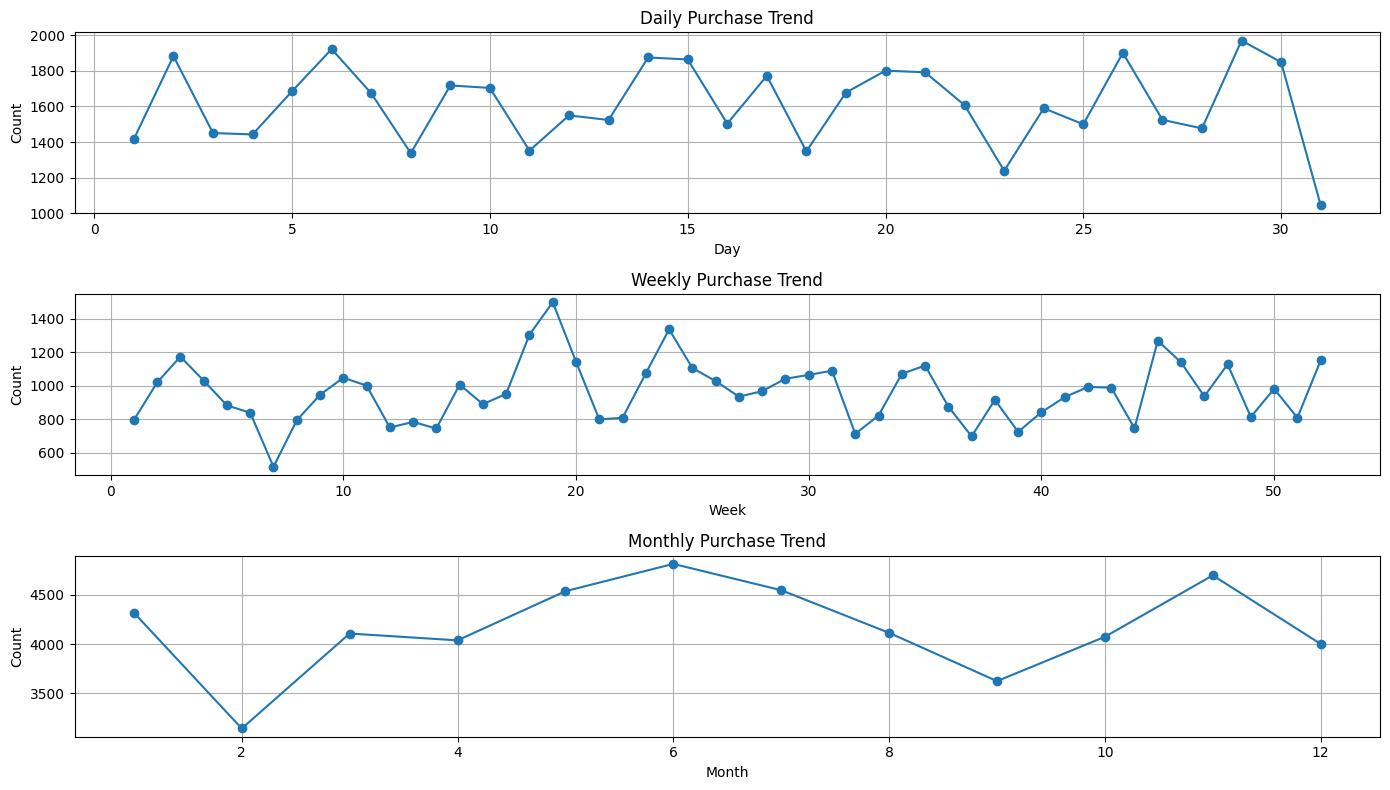

In [27]:
# Temporal Analysis for Purchase Date

# Convert PurchaseDate column to datetime with specified format
date_format = '%d-%m-%Y %H:%M'
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], format=date_format, errors='coerce')

# Create additional columns for day, week, and month
df['Day'] = df['PurchaseDate'].dt.day
df['Week'] = df['PurchaseDate'].dt.week
df['Month'] = df['PurchaseDate'].dt.month
df['Year'] = df['PurchaseDate'].dt.year

# Group by day, week, and month to analyze trends
daily_count = df.groupby('Day')['CustomerID'].count()
weekly_count = df.groupby('Week')['CustomerID'].count()
monthly_count = df.groupby('Month')['CustomerID'].count()

# Plot time series for purchase date
plt.figure(figsize=(14, 8))

# Daily trend
plt.subplot(3, 1, 1)
daily_count.plot(marker='o', linestyle='-')
plt.title('Daily Purchase Trend')
plt.xlabel('Day')
plt.ylabel('Count')
plt.grid(True)

# Weekly trend
plt.subplot(3, 1, 2)
weekly_count.plot(marker='o', linestyle='-')
plt.title('Weekly Purchase Trend')
plt.xlabel('Week')
plt.ylabel('Count')
plt.grid(True)

# Monthly trend
plt.subplot(3, 1, 3)
monthly_count.plot(marker='o', linestyle='-')
plt.title('Monthly Purchase Trend')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()
